#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Getting an overview of the dataset

In [2]:
df = pd.read_csv('aviation_data.csv')
df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN


In [3]:
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN
5,UA9101,09/02/2023,05:00 PM,09/02/2023,07:15 PM,United Airlines,20.0
6,AA1234,09/02/2023,08:30 PM,09/03/2023,10:45 AM,American Airlines,60.0
7,DL5678,09/03/2023,01:00 PM,09/03/2023,03:30 PM,Delta,10.0
8,UA9101,09/03/2023,03:00 PM,09/03/2023,05:20 PM,United Airlines,NaN
9,AA1234,09/03/2023,08:30 AM,09/03/2023,10:00 AM,American Airlines,15.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FlightNumber   12 non-null     object 
 1   DepartureDate  12 non-null     object 
 2   DepartureTime  12 non-null     object 
 3   ArrivalDate    12 non-null     object 
 4   ArrivalTime    12 non-null     object 
 5   Airline        12 non-null     object 
 6   DelayMinutes   10 non-null     float64
dtypes: float64(1), object(6)
memory usage: 804.0+ bytes


#### Data Cleaning and Normalization

In [5]:
# Convert dates to YYYY-MM-DD format
df["DepartureDate"] = pd.to_datetime(df["DepartureDate"], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
df["ArrivalDate"] = pd.to_datetime(df["ArrivalDate"], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")

In [6]:
# Convert times to 24-hour format
def convert_12_to_24_hour(time_str):
    t, ap = time_str.split(" ")
    hours, minutes = t.split(":")
    hours = int(hours)
    minutes = int(minutes)

    if ap == "PM" and hours != 12:
        hours += 12

    return f"{hours:02d}:{minutes:02d}"

df["DepartureTime"] = df["DepartureTime"].apply(convert_12_to_24_hour)
df["ArrivalTime"] = df["ArrivalTime"].apply(convert_12_to_24_hour)

df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,15.0
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.0
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.0
3,AA1234,2023-09-01,08:30,2023-09-01,22:45,American Airlines,30.0
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,NaN
5,UA9101,2023-09-02,17:00,2023-09-02,19:15,United Airlines,20.0
6,AA1234,2023-09-02,20:30,2023-09-03,10:45,American Airlines,60.0
7,DL5678,2023-09-03,13:00,2023-09-03,15:30,Delta,10.0
8,UA9101,2023-09-03,15:00,2023-09-03,17:20,United Airlines,NaN
9,AA1234,2023-09-03,08:30,2023-09-03,10:00,American Airlines,15.0


In [7]:
# Converting time into HH:MM format
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'], format='%H:%M').dt.strftime("%H:%M")
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M').dt.strftime("%H:%M")
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,15.0
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.0
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.0
3,AA1234,2023-09-01,08:30,2023-09-01,22:45,American Airlines,30.0
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,NaN
5,UA9101,2023-09-02,17:00,2023-09-02,19:15,United Airlines,20.0
6,AA1234,2023-09-02,20:30,2023-09-03,10:45,American Airlines,60.0
7,DL5678,2023-09-03,13:00,2023-09-03,15:30,Delta,10.0
8,UA9101,2023-09-03,15:00,2023-09-03,17:20,United Airlines,NaN
9,AA1234,2023-09-03,08:30,2023-09-03,10:00,American Airlines,15.0


In [8]:
# Getting date and time into the same column for departure and arrival
df['Departure'] = df['DepartureDate'] + ' ' + df['DepartureTime']
df['Arrival'] = df['ArrivalDate'] + ' ' + df['ArrivalTime']
df.drop(['DepartureDate','DepartureTime','ArrivalDate','ArrivalTime'], axis=1)
df = df[['FlightNumber', 'Departure', 'Arrival', 'Airline', 'DelayMinutes']]
df

,FlightNumber,Departure,Arrival,Airline,DelayMinutes
0,AA1234,2023-09-01 08:30,2023-09-01 10:45,American Airlines,15.0
1,DL5678,2023-09-01 13:15,2023-09-01 15:30,Delta,5.0
2,UA9101,2023-09-01 17:00,2023-09-01 19:15,United Airlines,25.0
3,AA1234,2023-09-01 08:30,2023-09-01 22:45,American Airlines,30.0
4,DL5678,2023-09-02 14:00,2023-09-02 16:10,Delta,NaN
5,UA9101,2023-09-02 17:00,2023-09-02 19:15,United Airlines,20.0
6,AA1234,2023-09-02 20:30,2023-09-03 10:45,American Airlines,60.0
7,DL5678,2023-09-03 13:00,2023-09-03 15:30,Delta,10.0
8,UA9101,2023-09-03 15:00,2023-09-03 17:20,United Airlines,NaN
9,AA1234,2023-09-03 08:30,2023-09-03 10:00,American Airlines,15.0


In [9]:
df.loc[:, 'Departure'] = pd.to_datetime(df['Departure'], format='%Y-%m-%d %H:%M')
df.loc[:, 'Arrival'] = pd.to_datetime(df['Arrival'], format='%Y-%m-%d %H:%M')

# Getting the duration of each flight
df.loc[:, 'FlightDuration'] = df.loc[:, 'Arrival'] - df.loc[:, 'Departure']
df

,FlightNumber,Departure,Arrival,Airline,DelayMinutes,FlightDuration
0,AA1234,2023-09-01 08:30:00,2023-09-01 10:45:00,American Airlines,15.0,0 days 02:15:00
1,DL5678,2023-09-01 13:15:00,2023-09-01 15:30:00,Delta,5.0,0 days 02:15:00
2,UA9101,2023-09-01 17:00:00,2023-09-01 19:15:00,United Airlines,25.0,0 days 02:15:00
3,AA1234,2023-09-01 08:30:00,2023-09-01 22:45:00,American Airlines,30.0,0 days 14:15:00
4,DL5678,2023-09-02 14:00:00,2023-09-02 16:10:00,Delta,NaN,0 days 02:10:00
5,UA9101,2023-09-02 17:00:00,2023-09-02 19:15:00,United Airlines,20.0,0 days 02:15:00
6,AA1234,2023-09-02 20:30:00,2023-09-03 10:45:00,American Airlines,60.0,0 days 14:15:00
7,DL5678,2023-09-03 13:00:00,2023-09-03 15:30:00,Delta,10.0,0 days 02:30:00
8,UA9101,2023-09-03 15:00:00,2023-09-03 17:20:00,United Airlines,NaN,0 days 02:20:00
9,AA1234,2023-09-03 08:30:00,2023-09-03 10:00:00,American Airlines,15.0,0 days 01:30:00


In [10]:
# Dropping the flight details with duration greater than 3 hrs
df['FlightDuration'] = pd.to_timedelta(df['FlightDuration'])
df = df[df['FlightDuration'] <= pd.Timedelta(hours=3)].reset_index(drop=True)
df

,FlightNumber,Departure,Arrival,Airline,DelayMinutes,FlightDuration
0,AA1234,2023-09-01 08:30:00,2023-09-01 10:45:00,American Airlines,15.0,0 days 02:15:00
1,DL5678,2023-09-01 13:15:00,2023-09-01 15:30:00,Delta,5.0,0 days 02:15:00
2,UA9101,2023-09-01 17:00:00,2023-09-01 19:15:00,United Airlines,25.0,0 days 02:15:00
3,DL5678,2023-09-02 14:00:00,2023-09-02 16:10:00,Delta,NaN,0 days 02:10:00
4,UA9101,2023-09-02 17:00:00,2023-09-02 19:15:00,United Airlines,20.0,0 days 02:15:00
5,DL5678,2023-09-03 13:00:00,2023-09-03 15:30:00,Delta,10.0,0 days 02:30:00
6,UA9101,2023-09-03 15:00:00,2023-09-03 17:20:00,United Airlines,NaN,0 days 02:20:00
7,AA1234,2023-09-03 08:30:00,2023-09-03 10:00:00,American Airlines,15.0,0 days 01:30:00
8,DL5678,2023-09-04 12:30:00,2023-09-04 14:40:00,Delta,25.0,0 days 02:10:00
9,UA9101,2023-09-04 19:00:00,2023-09-04 21:15:00,United Airlines,45.0,0 days 02:15:00


In [11]:
# Filling the null values with the median delay as per each airline
df['DelayMinutes'] = df.groupby('Airline')['DelayMinutes'].transform('median').fillna(df['DelayMinutes'].median())
df

,FlightNumber,Departure,Arrival,Airline,DelayMinutes,FlightDuration
0,AA1234,2023-09-01 08:30:00,2023-09-01 10:45:00,American Airlines,15.0,0 days 02:15:00
1,DL5678,2023-09-01 13:15:00,2023-09-01 15:30:00,Delta,10.0,0 days 02:15:00
2,UA9101,2023-09-01 17:00:00,2023-09-01 19:15:00,United Airlines,25.0,0 days 02:15:00
3,DL5678,2023-09-02 14:00:00,2023-09-02 16:10:00,Delta,10.0,0 days 02:10:00
4,UA9101,2023-09-02 17:00:00,2023-09-02 19:15:00,United Airlines,25.0,0 days 02:15:00
5,DL5678,2023-09-03 13:00:00,2023-09-03 15:30:00,Delta,10.0,0 days 02:30:00
6,UA9101,2023-09-03 15:00:00,2023-09-03 17:20:00,United Airlines,25.0,0 days 02:20:00
7,AA1234,2023-09-03 08:30:00,2023-09-03 10:00:00,American Airlines,15.0,0 days 01:30:00
8,DL5678,2023-09-04 12:30:00,2023-09-04 14:40:00,Delta,10.0,0 days 02:10:00
9,UA9101,2023-09-04 19:00:00,2023-09-04 21:15:00,United Airlines,25.0,0 days 02:15:00


#### Data Analysis

In [12]:
average_delay = pd.DataFrame(df.groupby('Airline')['DelayMinutes'].mean())
average_delay

,DelayMinutes
Airline,
American Airlines,15.0
Delta,10.0
United Airlines,25.0


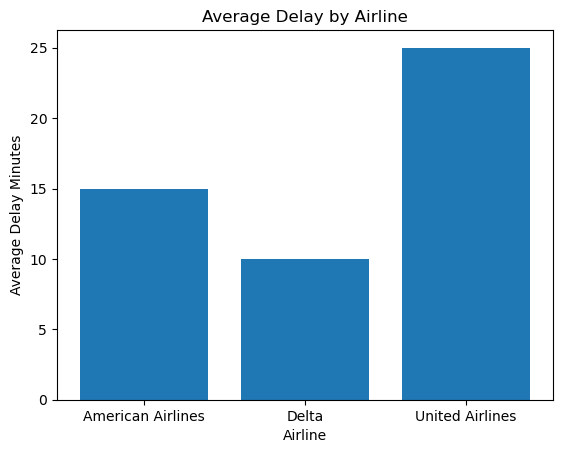

In [13]:
plt.bar(average_delay.index, average_delay['DelayMinutes'])
plt.xlabel('Airline')
plt.ylabel('Average Delay Minutes')
plt.title('Average Delay by Airline')
plt.show()

In [14]:
df['Departure'] = pd.to_datetime(df['Departure'], format='%Y-%m-%d %H:%M')

df['DepartureHour'] = df['Departure'].dt.hour

grouped_data = df.groupby('DepartureHour')['DelayMinutes'].mean()
pd.DataFrame(grouped_data)

,DelayMinutes
DepartureHour,
8,15.0
12,10.0
13,10.0
14,10.0
15,25.0
17,25.0
19,25.0


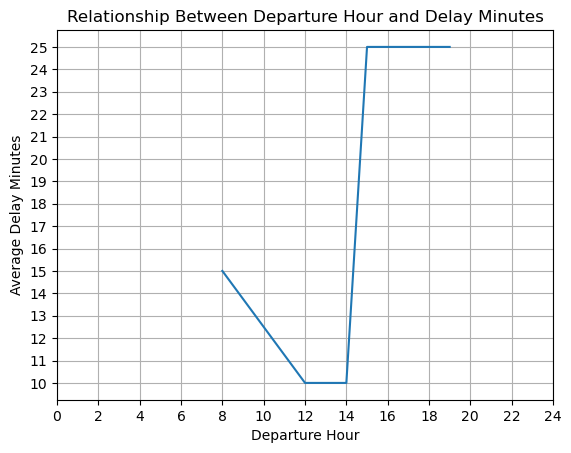

In [15]:
m, M = int(min(grouped_data.values)), int(max(grouped_data.values))

ax = plt.axes()
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay Minutes')
ax.set_xticks(np.linspace(0,24,13))
ax.set_yticks(np.linspace(m, M, M-m+1))
plt.title('Relationship Between Departure Hour and Delay Minutes')
plt.grid(True)
plt.show()

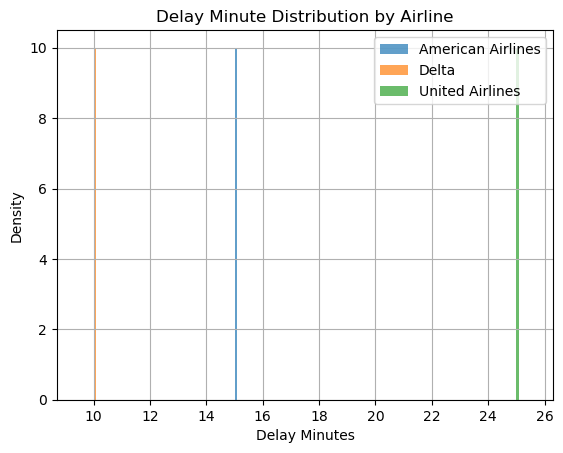

In [16]:
# Group by Airline and plot histograms
for airline in df['Airline'].unique():
    airline_data = df[df['Airline'] == airline]['DelayMinutes']
    airline_data.hist(label=airline, alpha=0.7, density=True)

# Set labels and title
plt.xlabel('Delay Minutes')
plt.ylabel('Density')
plt.title('Delay Minute Distribution by Airline')
plt.legend(loc='best')
plt.show()

#### Exporting cleaned dataset to new CSV file

In [17]:
df.to_csv('cleaned_data.csv', index=False)